# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\ML_Project\Diabetes_prediction_Project_2\diabetes_prediction_dataset.csv")

In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Describe the data

In [10]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Histogram for age

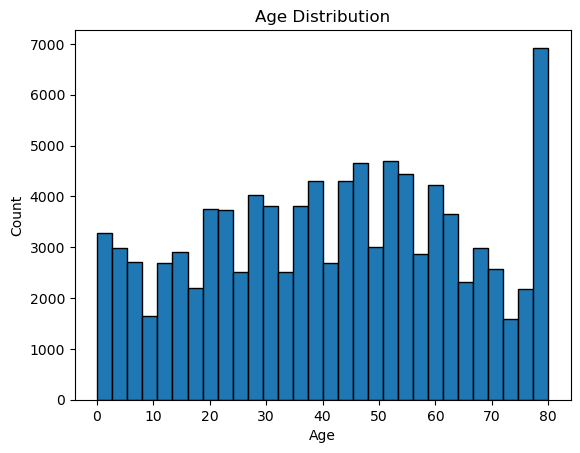

In [25]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Bar plot for gender

C:\Users\HP\AppData\Local\Temp\ipykernel_15100\1718415864.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


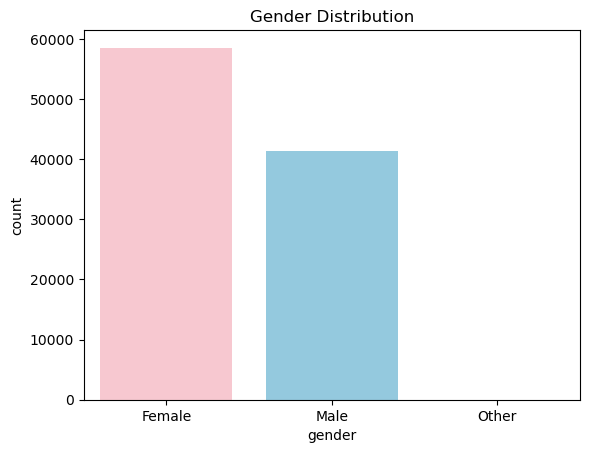

In [23]:
sns.countplot(
    x='gender',
    data=df,
    palette={'Male': 'skyblue', 'Female': 'pink', 'Other': 'green'}
)
plt.title('Gender Distribution')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_15100\1023748953.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], bins=30)


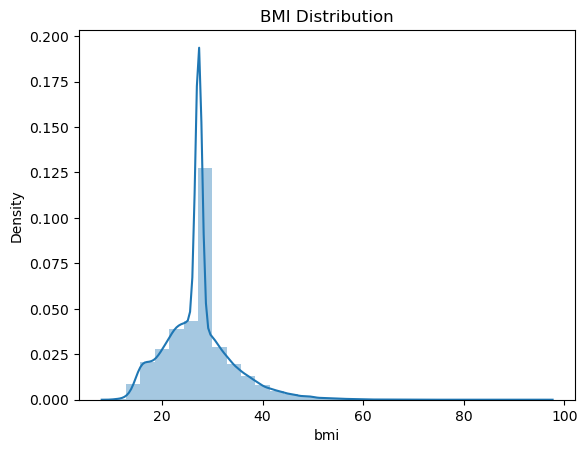

In [29]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

# Count plots for binary variables

C:\Users\HP\AppData\Local\Temp\ipykernel_15100\1078504122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")  # Seaborn palette


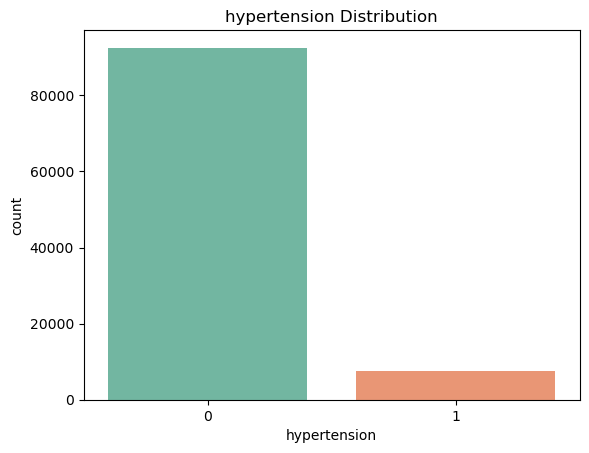

C:\Users\HP\AppData\Local\Temp\ipykernel_15100\1078504122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")  # Seaborn palette


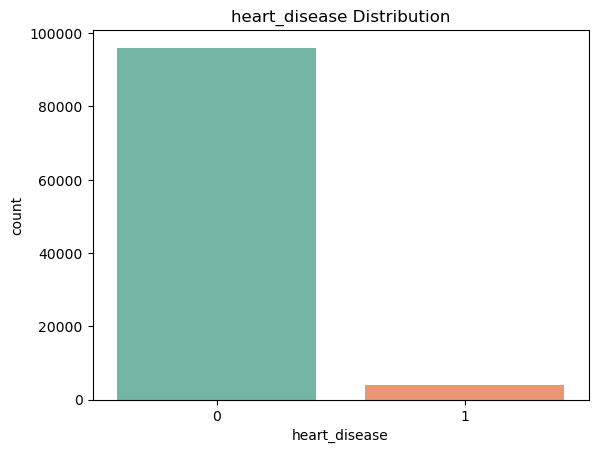

C:\Users\HP\AppData\Local\Temp\ipykernel_15100\1078504122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")  # Seaborn palette


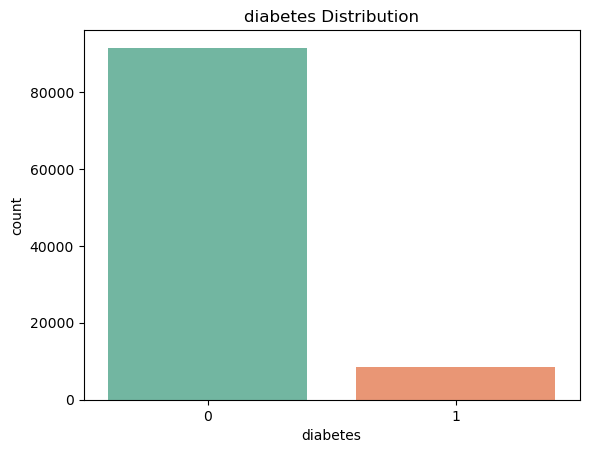

In [36]:
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df, palette="Set2")  # Seaborn palette
    plt.title(f'{col} Distribution')
    plt.show()

# Count plot for smoking history

C:\Users\HP\AppData\Local\Temp\ipykernel_15100\1164746893.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_history', data=df, palette="Set2")


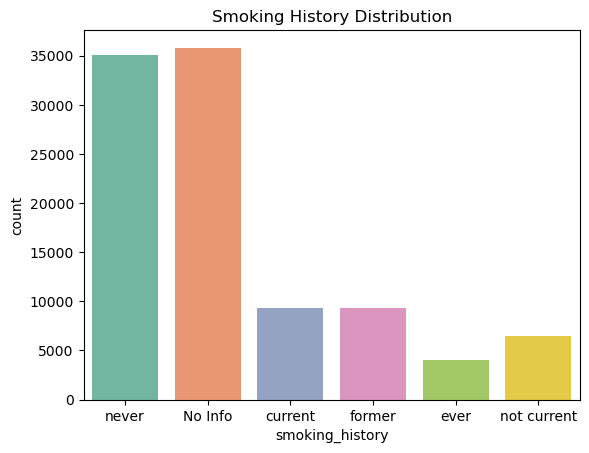

In [40]:
sns.countplot(x='smoking_history', data=df, palette="Set2")
plt.title('Smoking History Distribution')
plt.show()

# Count plot of gender vs diabetes

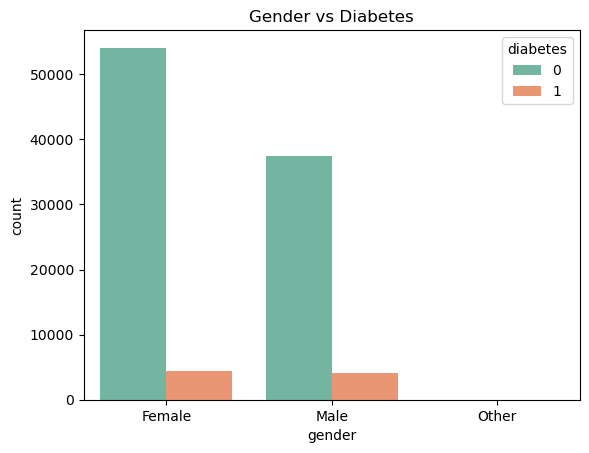

In [45]:
sns.countplot(x='gender', hue='diabetes', data=df,palette="Set2")
plt.title('Gender vs Diabetes')
plt.show()

# Interaction between gender, Age and diabetes

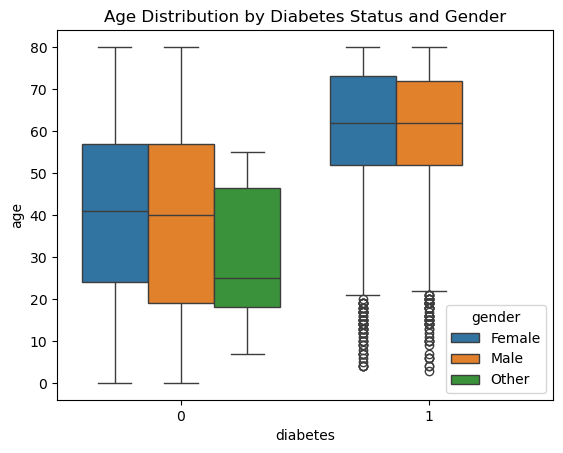

In [50]:
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

In [160]:
# Map 'gender' column
gender_mapping = {'Female': 0, 'Male': 1, 'Other': 2}
df['gender'] = df['gender'].map(gender_mapping)


In [99]:
# Map 'smoking_history' column
smoking_mapping = {
    'never': 0,
    'No Info': 1,
    'current': 2,
    'former': 3,
    'ever': 4,
    'not current': 5
}
df['smoking_history'] = df['smoking_history'].map(smoking_mapping)


In [101]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [103]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [105]:
# Separate features (X) and target (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Train test split

In [107]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [111]:
y_pred = model.predict(X_test)

In [113]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18292
           1       0.80      0.57      0.66      1708

    accuracy                           0.95     20000
   macro avg       0.88      0.78      0.82     20000
weighted avg       0.95      0.95      0.95     20000



# Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [117]:
y_pred_rf = model_rf.predict(X_test)

In [119]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
[[18225    67]
 [  533  1175]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Accuracy Score: 0.97


# Make predictive system

In [133]:
# To make a prediction on a new data point, you'll need to create a pandas DataFrame with the same columns as your training data.
# Let's say you have the following new data:
new_data = pd.DataFrame({
    'gender': [0], # Female
    'age': [54.0],
    'hypertension': [0],
    'heart_disease': [0],
    'smoking_history': [1], 
    'bmi': [27.32],
    'HbA1c_level': [6.6],
    'blood_glucose_level': [80]
})

# Make a prediction
prediction = model.predict(new_data)

# Print the prediction
if prediction[0] == 1:
    print("The model predicts diabetes.")
else:
    print("The model predicts no diabetes.")


The model predicts no diabetes.


# Saving the trained model

In [138]:
import joblib

# Assuming your trained model is named 'model'
joblib.dump(model, 'diabetes_prediction_model.pkl')

print("Model saved as diabetes_prediction_model.pkl")

Model saved as diabetes_prediction_model.pkl
